<a href="https://colab.research.google.com/github/miguelespinosa88/DIDI/blob/main/DIDi_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 

Objetivo: Diseñar una estrategia de lanzamiento para Didi Food Growth en un país en el cual seleccionaremos a partir del análisis de datos brindados por la compañía.

Introducción: Hoy en día los datos representan un elemento de gran valor para las compañías ya que estas permiten realizar un análisis de los comportamientos del mercado y predecir cuales formas son las mejores para realizar un lanzamiento de un nuevo producto. En el presente documento se mostrará un análisis de datos que permita identificar las mejores oportunidades de mercado al lanzar un producto específico y formas de reducir costos a partir de estrategias que involucren a los conductores.

Estructura:     
- Problema 1: Seleccionar el mejor canal de conversión para adquirir nuevos conductores en el país en el que se lanzara el servicio de Didi Food.
- Problema 2: Identificar si la implementación de un programa de lealtad representa una mejora significativa en la cantidad de viajes por usuario.
- Problema 3: Aumentar el tiempo de disponibilidad de conductores en la aplicación sin utilizar la conversión de nuevos conductores.


Problema 1

Se descargan los datos de GitHub y se organizan en 3 diferentes datasets

In [ ]:
pathLS = 'https://raw.githubusercontent.com/Kheri-C/ML/main/Launch_strategy.csv'
df_driverStatus = pd.read_csv(pathLS)
pathLC = 'https://raw.githubusercontent.com/Kheri-C/ML/main/Lead_Channel.csv'
df_leadChannel = pd.read_csv(pathLC)
pathLCC = 'https://raw.githubusercontent.com/Kheri-C/ML/main/Lead_Channel_Cost2.csv'
df_leadChannelCost = pd.read_csv(pathLCC)

,Lead channel,Overall cost
0,Organic,53000.00
1,Referral,12460.00
2,Offline,17279.82
3,Paid,4097.69


In [ ]:
df_driverStatus

,Driver ID,Employee ID,Driver status
0,6909701,6,Step 1: Registration
1,6905703,8,Step 2: Ready to Drive
2,6906374,6,Step 2: Ready to Drive
3,6905257,1,Step 3: Regular Driver
4,6908899,10,Step 3: Regular Driver
...,...,...,...
995,6909545,2,Step 3: Regular Driver
996,6905791,1,Step 3: Regular Driver
997,6907937,1,Step 3: Regular Driver
998,6908381,1,Step 1: Registration


In [ ]:
df_leadChannel

,Employee ID,Lead channel
0,1,Organic
1,2,Organic
2,3,Organic
3,4,Referral
4,5,Offline
5,6,Offline
6,7,Offline
7,8,Paid
8,9,Paid
9,10,Referral


In [ ]:
df_leadChannelCost

,Lead channel,Overall cost
0,Organic,53000.00
1,Referral,12460.00
2,Offline,17279.82
3,Paid,4097.69


Se unifican los datos en un dataset general para poder analizarlos y eliminar columnas que no aporten información al análisis

In [ ]:
df_merge_v1 = pd.merge(df_driverStatus, df_leadChannel)

In [ ]:
df_merge_v1.keys()

Index(['Driver ID', 'Employee ID', 'Driver status', 'Lead channel'], dtype='object')

In [ ]:
df_merge_v1.loc[df_merge_v1["Employee ID"]== 10]

,Driver ID,Employee ID,Driver status,Lead channel
312,6908899,10,Step 3: Regular Driver,Referral
313,6908492,10,Step 3: Regular Driver,Referral
314,6905661,10,Step 3: Regular Driver,Referral
315,6907566,10,Step 3: Regular Driver,Referral
316,6907658,10,Step 3: Regular Driver,Referral
317,6909867,10,Step 3: Regular Driver,Referral
318,6907515,10,Step 3: Regular Driver,Referral
319,6908569,10,Step 3: Regular Driver,Referral
320,6906334,10,Step 3: Regular Driver,Referral
321,6908663,10,Step 3: Regular Driver,Referral


In [ ]:
df_launchSt = pd.merge(df_merge_v1,df_leadChannelCost)

In [ ]:
df_launchSt

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost
0,6909701,6,Step 1: Registration,Offline,17279.82
1,6906374,6,Step 2: Ready to Drive,Offline,17279.82
2,6905424,6,Step 3: Regular Driver,Offline,17279.82
3,6907092,6,Step 3: Regular Driver,Offline,17279.82
4,6909301,6,Step 1: Registration,Offline,17279.82
...,...,...,...,...,...
995,6909654,4,Step 2: Ready to Drive,Referral,12460.00
996,6908362,4,Step 1: Registration,Referral,12460.00
997,6907576,4,Step 3: Regular Driver,Referral,12460.00
998,6906446,4,Step 3: Regular Driver,Referral,12460.00


In [ ]:
df_launchSt.loc[df_launchSt["Driver status"]== "Step 1: Registration"]

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost
0,6909701,6,Step 1: Registration,Offline,17279.82
4,6909301,6,Step 1: Registration,Offline,17279.82
5,6907123,6,Step 1: Registration,Offline,17279.82
12,6908169,6,Step 1: Registration,Offline,17279.82
14,6909679,6,Step 1: Registration,Offline,17279.82
...,...,...,...,...,...
982,6909316,4,Step 1: Registration,Referral,12460.00
989,6907134,4,Step 1: Registration,Referral,12460.00
992,6905287,4,Step 1: Registration,Referral,12460.00
994,6907572,4,Step 1: Registration,Referral,12460.00


In [ ]:
df_launchSt.loc[df_launchSt["Driver status"]== "Step 1: Registration"]

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost
0,6909701,6,Step 1: Registration,Offline,17279.82
4,6909301,6,Step 1: Registration,Offline,17279.82
5,6907123,6,Step 1: Registration,Offline,17279.82
12,6908169,6,Step 1: Registration,Offline,17279.82
14,6909679,6,Step 1: Registration,Offline,17279.82
...,...,...,...,...,...
982,6909316,4,Step 1: Registration,Referral,12460.00
989,6907134,4,Step 1: Registration,Referral,12460.00
992,6905287,4,Step 1: Registration,Referral,12460.00
994,6907572,4,Step 1: Registration,Referral,12460.00


In [ ]:
df_launchSt.drop((df_launchSt.loc[df_launchSt["Driver status"]== "Step 1: Registration"]).index,inplace=True)

In [ ]:
df_launchSt

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost
1,6906374,6,Step 2: Ready to Drive,Offline,17279.82
2,6905424,6,Step 3: Regular Driver,Offline,17279.82
3,6907092,6,Step 3: Regular Driver,Offline,17279.82
6,6906393,6,Step 2: Ready to Drive,Offline,17279.82
7,6905768,6,Step 2: Ready to Drive,Offline,17279.82
...,...,...,...,...,...
993,6905638,4,Step 2: Ready to Drive,Referral,12460.00
995,6909654,4,Step 2: Ready to Drive,Referral,12460.00
997,6907576,4,Step 3: Regular Driver,Referral,12460.00
998,6906446,4,Step 3: Regular Driver,Referral,12460.00


In [ ]:
df_launchSt.reset_index(drop=True)

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost
0,6906374,6,Step 2: Ready to Drive,Offline,17279.82
1,6905424,6,Step 3: Regular Driver,Offline,17279.82
2,6907092,6,Step 3: Regular Driver,Offline,17279.82
3,6906393,6,Step 2: Ready to Drive,Offline,17279.82
4,6905768,6,Step 2: Ready to Drive,Offline,17279.82
...,...,...,...,...,...
837,6905638,4,Step 2: Ready to Drive,Referral,12460.00
838,6909654,4,Step 2: Ready to Drive,Referral,12460.00
839,6907576,4,Step 3: Regular Driver,Referral,12460.00
840,6906446,4,Step 3: Regular Driver,Referral,12460.00


Se cuenta la cantidad de conductores convertidos por cada canal diferente y se genera una tabla adicional que relacione el costo con el número de conductores adquiridos, de forma que se genere un costo por conversión

In [ ]:
df_conversion_per_channel = df_launchSt.groupby(["Lead channel"]).count()

In [ ]:
df_conversion_per_channel

,Driver ID,Employee ID,Driver status,Overall cost
Lead channel,,,,
Offline,231,231,231,231
Organic,278,278,278,278
Paid,193,193,193,193
Referral,140,140,140,140


In [ ]:
df_conversion_per_channel.drop(['Employee ID', 'Driver status','Overall cost'], axis=1,inplace=True)

In [ ]:
df_conversion_per_channel = df_conversion_per_channel.rename(columns={"Driver ID":"Number of conversion"}).reset_index()

In [ ]:
df_conversion_per_channel

,Lead channel,Number of conversion
0,Offline,231
1,Organic,278
2,Paid,193
3,Referral,140


In [ ]:
df_launchSt_conversion = pd.merge(df_launchSt,df_conversion_per_channel)

In [ ]:
df_launchSt_conversion

,Driver ID,Employee ID,Driver status,Lead channel,Overall cost,Number of conversion
0,6906374,6,Step 2: Ready to Drive,Offline,17279.82,231
1,6905424,6,Step 3: Regular Driver,Offline,17279.82,231
2,6907092,6,Step 3: Regular Driver,Offline,17279.82,231
3,6906393,6,Step 2: Ready to Drive,Offline,17279.82,231
4,6905768,6,Step 2: Ready to Drive,Offline,17279.82,231
...,...,...,...,...,...,...
837,6905638,4,Step 2: Ready to Drive,Referral,12460.00,140
838,6909654,4,Step 2: Ready to Drive,Referral,12460.00,140
839,6907576,4,Step 3: Regular Driver,Referral,12460.00,140
840,6906446,4,Step 3: Regular Driver,Referral,12460.00,140


<BarContainer object of 842 artists>

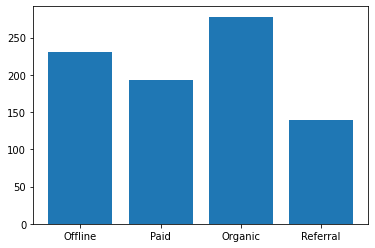

In [ ]:
import matplotlib.pyplot as plt
plt.bar(df_launchSt_conversion["Lead channel"],df_launchSt_conversion["Number of conversion"])

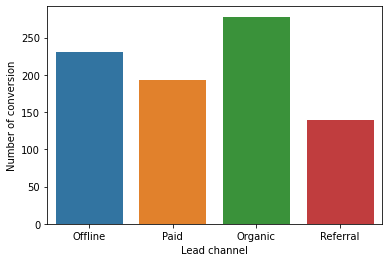

In [ ]:
import seaborn as sns
sns.barplot(data=df_launchSt_conversion, x="Lead channel", y="Number of conversion")

In [ ]:
df_formula = df_launchSt_conversion.drop(["Driver ID",	"Employee ID",	"Driver status"],axis =1)

In [ ]:
df_formula.drop_duplicates(inplace=True)

In [ ]:
df_formula.reset_index(drop=True,inplace=True)

In [ ]:
df_formula

,Lead channel,Overall cost,Number of conversion
0,Offline,17279.82,231
1,Paid,4097.69,193
2,Organic,53000.00,278
3,Referral,12460.00,140


In [ ]:
df_formula["Cost per conversion"] = df_formula["Overall cost"]/df_formula["Number of conversion"]

In [ ]:
df_formula

,Lead channel,Overall cost,Number of conversion,Cost per conversion
0,Offline,17279.82,231,74.804416
1,Paid,4097.69,193,21.231554
2,Organic,53000.00,278,190.647482
3,Referral,12460.00,140,89.000000


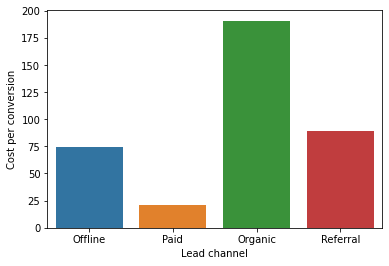

In [ ]:
import seaborn as sns
sns.barplot(data=df_formula, x="Lead channel", y="Cost per conversion")

In [ ]:
pathMD = 'https://raw.githubusercontent.com/Kheri-C/ML/main/Market_Demand.csv'
df_marketDemand = pd.read_csv(pathMD)

Problema 2

In [ ]:
df_marketDemand

,Month,Passenger ID,Passenger Group,Test group,Trips
0,July,800000,Medium,Loyalty,6
1,July,800001,Low,Control,0
2,July,800002,Medium,Loyalty,6
3,July,800003,Medium,Control,5
4,July,800004,Low,Loyalty,0
...,...,...,...,...,...
19993,August,809994,Low,Loyalty,2
19994,August,809995,High,Control,9
19995,August,809996,Low,Loyalty,4
19996,August,809997,Medium,Control,6


Se divide el análisis en los grupos de control y de lealtad. Se anexa a la tabla de cada uno de ellos un valor que represente la diferencia de viajes entre julio y agosto para observar si este aumentó, disminuyó, o se mantuvo constante; y a partir de esta información decidir si funcionó o no la estrategia del programa de lealtad.

In [ ]:
df_marketDemand_July = df_marketDemand.loc[df_marketDemand["Month"]=="July"]

In [ ]:
df_marketDemand_August = df_marketDemand.loc[df_marketDemand["Month"]=="August"]

In [ ]:
df_marketDemand_August.drop(["Month","Passenger Group","Test group"],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_marketDemand_August.reset_index(drop=True,inplace=True)

In [ ]:
df_marketDemand_August

,Passenger ID,Trips
0,800000,4
1,800001,1
2,800002,5
3,800003,4
4,800004,1
...,...,...
9994,809994,2
9995,809995,9
9996,809996,4
9997,809997,6


In [ ]:
df_marketDemand_August.rename(columns={"Trips":"Trips August"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_marketDemand_August.reset_index(drop=True)

,Passenger ID,Trips August
0,800000,4
1,800001,1
2,800002,5
3,800003,4
4,800004,1
...,...,...
9994,809994,2
9995,809995,9
9996,809996,4
9997,809997,6


In [ ]:
df_marketDemand_July.rename(columns={"Trips":"Trips July"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_marketDemand_July.reset_index(drop=True)

,Month,Passenger ID,Passenger Group,Test group,Trips July
0,July,800000,Medium,Loyalty,6
1,July,800001,Low,Control,0
2,July,800002,Medium,Loyalty,6
3,July,800003,Medium,Control,5
4,July,800004,Low,Loyalty,0
...,...,...,...,...,...
9994,July,809994,Low,Loyalty,2
9995,July,809995,High,Control,8
9996,July,809996,Low,Loyalty,0
9997,July,809997,Medium,Control,4


In [ ]:
df_marketDemand_merged = pd.merge(df_marketDemand_July,df_marketDemand_August)

In [ ]:
df_marketDemand_merged.drop(["Month"],axis=1,inplace=True)

In [ ]:
df_marketDemand_merged

,Passenger ID,Passenger Group,Test group,Trips July,Trips August
0,800000,Medium,Loyalty,6,4
1,800001,Low,Control,0,1
2,800002,Medium,Loyalty,6,5
3,800003,Medium,Control,5,4
4,800004,Low,Loyalty,0,1
...,...,...,...,...,...
9994,809994,Low,Loyalty,2,2
9995,809995,High,Control,8,9
9996,809996,Low,Loyalty,0,4
9997,809997,Medium,Control,4,6


In [ ]:
df_marketDemand_merged["Difference after test"] = df_marketDemand_merged["Trips August"]-df_marketDemand_merged["Trips July"]

In [ ]:
df_marketDemand_merged

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
0,800000,Medium,Loyalty,6,4,-2
1,800001,Low,Control,0,1,1
2,800002,Medium,Loyalty,6,5,-1
3,800003,Medium,Control,5,4,-1
4,800004,Low,Loyalty,0,1,1
...,...,...,...,...,...,...
9994,809994,Low,Loyalty,2,2,0
9995,809995,High,Control,8,9,1
9996,809996,Low,Loyalty,0,4,4
9997,809997,Medium,Control,4,6,2


In [ ]:
df_loyalty = df_marketDemand_merged.loc[df_marketDemand_merged["Test group"] == "Loyalty"]

In [ ]:
df_loyalty

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
0,800000,Medium,Loyalty,6,4,-2
2,800002,Medium,Loyalty,6,5,-1
4,800004,Low,Loyalty,0,1,1
6,800006,Medium,Loyalty,4,4,0
8,800008,Medium,Loyalty,6,7,1
...,...,...,...,...,...,...
9990,809990,Medium,Loyalty,5,8,3
9992,809992,Medium,Loyalty,4,9,5
9994,809994,Low,Loyalty,2,2,0
9996,809996,Low,Loyalty,0,4,4


In [ ]:
df_loyalty["Worked"] = df_loyalty['Difference after test'].apply(lambda x: 'True' if x > 0 else 'False')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_loyalty

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test,Worked
0,800000,Medium,Loyalty,6,4,-2,False
2,800002,Medium,Loyalty,6,5,-1,False
4,800004,Low,Loyalty,0,1,1,True
6,800006,Medium,Loyalty,4,4,0,False
8,800008,Medium,Loyalty,6,7,1,True
...,...,...,...,...,...,...,...
9990,809990,Medium,Loyalty,5,8,3,True
9992,809992,Medium,Loyalty,4,9,5,True
9994,809994,Low,Loyalty,2,2,0,False
9996,809996,Low,Loyalty,0,4,4,True


Partiendo de el número de viajes en julio y agosto, así como el grupo de pasajeros, se utilizó Random Forest para predecir si la estrategia funcionó o no. Se utilizó el 80% de los datos para entrenar el modelo y 20% para probarlo. Posteriormente se obtuvo la precisión del mismo.

In [ ]:
X = df_loyalty.drop(["Passenger ID","Difference after test","Worked","Test group"],axis="columns")
X = X.replace('Low',1)
X = X.replace('Medium',2)
X = X.replace('High',3)
y = df_loyalty["Worked"]
df_loyalty["Test group"].unique()

array(['Loyalty'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score
algoritmo = RandomForestClassifier()
#Entreno el modelo
algoritmo.fit(X_train, y_train)
#Realizo una predicción
y_pred = algoritmo.predict(X_test)
#Calculo la precisión del modelo
precision = precision_score(y_test, y_pred, average='micro')
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
1.0


In [ ]:
df_program_worked = df_loyalty.groupby(["Worked"]).count()

In [ ]:
df_program_worked

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
Worked,,,,,,
False,2079,2079,2079,2079,2079,2079
True,2921,2921,2921,2921,2921,2921


In [ ]:
df_program_worked.drop(["Passenger ID",	"Passenger Group",	"Test group","Trips July",	"Difference after test"],axis = 1,inplace=True)

In [ ]:
df_program_worked

,Trips August
Worked,
False,2079
True,2921


In [ ]:
df_program_worked.rename(columns={"Trips August":"Success cases"},inplace=True)

In [ ]:
df_program_worked

,Success cases
Worked,
False,2079
True,2921


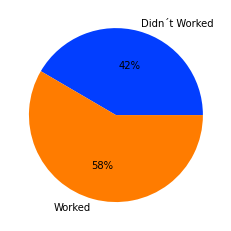

In [ ]:
labels = ['Didn´t Worked', 'Worked']
#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(df_program_worked["Success cases"], labels = labels , colors = colors, autopct='%.0f%%')
plt.show()

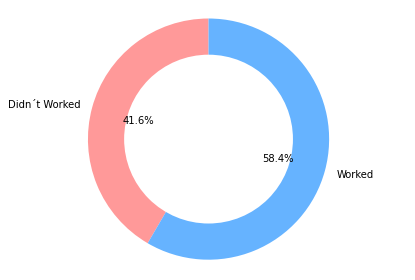

In [ ]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

 
fig1, ax1 = plt.subplots()
ax1.pie(df_program_worked["Success cases"], colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
df_control = df_marketDemand_merged.loc[df_marketDemand_merged["Test group"] == "Control"]

In [ ]:
df_control

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
1,800001,Low,Control,0,1,1
3,800003,Medium,Control,5,4,-1
5,800005,Medium,Control,6,5,-1
7,800007,Medium,Control,4,7,3
9,800009,Medium,Control,4,8,4
...,...,...,...,...,...,...
9989,809989,Medium,Control,4,8,4
9991,809991,Medium,Control,4,5,1
9993,809993,Medium,Control,5,5,0
9995,809995,High,Control,8,9,1


In [ ]:
df_control["Worked"] = df_control['Difference after test'].apply(lambda x: 'True' if x > 0 else 'False')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_control

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
1,800001,Low,Control,0,1,1
3,800003,Medium,Control,5,4,-1
5,800005,Medium,Control,6,5,-1
7,800007,Medium,Control,4,7,3
9,800009,Medium,Control,4,8,4
...,...,...,...,...,...,...
9989,809989,Medium,Control,4,8,4
9991,809991,Medium,Control,4,5,1
9993,809993,Medium,Control,5,5,0
9995,809995,High,Control,8,9,1


In [ ]:
df_program_worked_v2 = df_control.groupby(["Worked"]).count()

In [ ]:
df_program_worked_v2

,Passenger ID,Passenger Group,Test group,Trips July,Trips August,Difference after test
Worked,,,,,,
False,2230,2230,2230,2230,2230,2230
True,2769,2769,2769,2769,2769,2769


In [ ]:
df_program_worked_v2.drop(["Passenger ID",	"Passenger Group",	"Test group","Trips July",	"Difference after test"],axis = 1,inplace=True)

In [ ]:
df_program_worked_v2.rename(columns={"Trips August":"Success cases"},inplace=True)

In [ ]:
df_program_worked_v2

,Success cases
Worked,
False,2230
True,2769


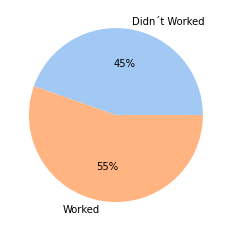

In [ ]:
labels = ['Didn´t Worked', 'Worked']
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(df_program_worked_v2["Success cases"], labels = labels , colors = colors, autopct='%.0f%%')
plt.show()

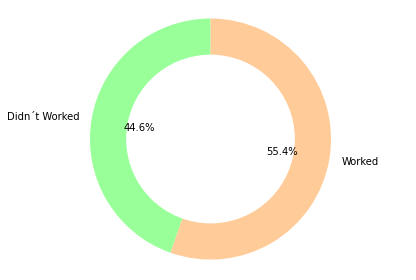

In [ ]:
#colors
colors = ['#99ff99','#ffcc99']

 
fig1, ax1 = plt.subplots()
ax1.pie(df_program_worked_v2["Success cases"], colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
# Tabla de contingencia class / survived
df_relation = pd.crosstab(index=df_loyalty["Worked"],columns=df_loyalty["Passenger Group"], margins=True)

In [ ]:
df_program_worked

,Worked,Success cases
0,False,2079
1,True,2921


In [ ]:
df_relation

Passenger Group,High,Low,Medium,All
Worked,,,,
False,283,991,805,2079
True,366,992,1563,2921
All,649,1983,2368,5000


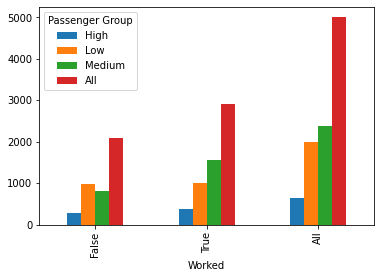

In [ ]:
df_relation.plot(kind='bar')

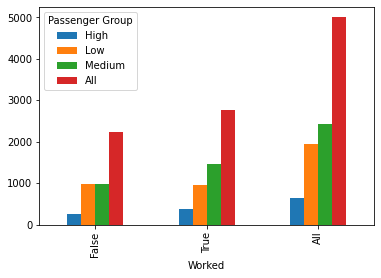

In [ ]:
# Tabla de contingencia class / survived
df_relation_control = pd.crosstab(index=df_control["Worked"],columns=df_control["Passenger Group"], margins=True)
df_relation_control.plot(kind='bar')

In [ ]:
df_relation_control

Passenger Group,High,Low,Medium,All
Worked,,,,
False,266,985,979,2230
True,368,949,1452,2769
All,634,1934,2431,4999


Problema 3

Se comenzó por descartar datos que fuesen inútiles de acuerdo al análisis que se planteó. Este tuvo como base observar la cantidad de horas en las que los conductores estaban disponibles y los viajes que fuesen cancelados.

In [ ]:
pathMS = 'https://raw.githubusercontent.com/Kheri-C/ML/main/Market_Supply5.csv'
df_marketSupply = pd.read_csv(pathMS)

In [ ]:
df_marketSupply= pd.read_excel('/content/sample_data/datos_modificados_Didi.xlsx', sheet_name='Market supply')

In [ ]:
df_marketSupply

,Date,Hour,Driver ID,Driver name,Online time,Charge time,Calls received,Trips completed
0,2019-04-15,10,650910888245286,Arturo,0.8,0.5,2.0,1.0
1,2019-04-15,10,650910888745648,Antonio,0.2,0.2,NaN,NaN
2,2019-04-15,6,650910888008337,Sergio,0.8,0.7,3.0,2.0
3,2019-04-15,17,650910886407988,OMAR,0.9,0.5,5.0,5.0
4,2019-04-15,10,650910887867900,Edgar,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
316565,2019-04-21,0,650910886334474,Juan,0.0,0.0,1.0,1.0
316566,2019-04-21,5,650910886291081,Mario,0.6,0.7,3.0,2.0
316567,2019-04-21,3,650910888390523,Maribel,0.8,0.4,3.0,2.0
316568,2019-04-21,16,650910887425087,Edgar,0.8,0.3,4.0,4.0


In [ ]:
df_marketSupply['dayOfWeek'] = df_marketSupply['Date'].dt.day_name()
df_marketSupply

,Date,Hour,Driver ID,Driver name,Online time,Charge time,Calls received,Trips completed,dayOfWeek
0,2019-04-15,10,650910888245286,Arturo,0.8,0.5,2.0,1.0,Monday
1,2019-04-15,10,650910888745648,Antonio,0.2,0.2,NaN,NaN,Monday
2,2019-04-15,6,650910888008337,Sergio,0.8,0.7,3.0,2.0,Monday
3,2019-04-15,17,650910886407988,OMAR,0.9,0.5,5.0,5.0,Monday
4,2019-04-15,10,650910887867900,Edgar,0.0,NaN,NaN,NaN,Monday
...,...,...,...,...,...,...,...,...,...
316565,2019-04-21,0,650910886334474,Juan,0.0,0.0,1.0,1.0,Sunday
316566,2019-04-21,5,650910886291081,Mario,0.6,0.7,3.0,2.0,Sunday
316567,2019-04-21,3,650910888390523,Maribel,0.8,0.4,3.0,2.0,Sunday
316568,2019-04-21,16,650910887425087,Edgar,0.8,0.3,4.0,4.0,Sunday


In [ ]:
df_marketSupply.dropna(inplace=True)

In [ ]:
df_marketSupply_online = df_marketSupply.drop(["Date",	"Hour",	"Driver ID",	"Driver name"], axis = 1)

In [ ]:
df_marketSupply_online

,Online time,Charge time,Calls received,Trips completed,dayOfWeek
0,0.8,0.5,2.0,1.0,Monday
2,0.8,0.7,3.0,2.0,Monday
3,0.9,0.5,5.0,5.0,Monday
5,1.0,0.5,2.0,0.0,Monday
6,1.0,0.6,5.0,1.0,Monday
...,...,...,...,...,...
316565,0.0,0.0,1.0,1.0,Sunday
316566,0.6,0.7,3.0,2.0,Sunday
316567,0.8,0.4,3.0,2.0,Sunday
316568,0.8,0.3,4.0,4.0,Sunday


In [ ]:
df_marketSupply_online.groupby("dayOfWeek").count().reset_index()

,dayOfWeek,Online time,Charge time,Calls received,Trips completed
0,Friday,44989,44989,44989,44989
1,Monday,33723,33723,33723,33723
2,Saturday,43015,43015,43015,43015
3,Sunday,30017,30017,30017,30017
4,Thursday,39918,39918,39918,39918
5,Tuesday,36113,36113,36113,36113
6,Wednesday,37719,37719,37719,37719


In [ ]:
df_marketSupply_online.groupby("dayOfWeek").sum().reset_index()

,dayOfWeek,Online time,Charge time,Calls received,Trips completed
0,Friday,32489.9,20301.5,115853.0,58032.0
1,Monday,23956.3,14193.9,82874.0,41433.0
2,Saturday,31262.9,19561.7,115178.0,57550.0
3,Sunday,21478.6,13162.2,87117.0,43358.0
4,Thursday,28420.0,16911.9,98487.0,49339.0
5,Tuesday,25797.2,15087.5,86947.0,43345.0
6,Wednesday,27023.8,15916.0,91154.0,45604.0


In [ ]:
df_marketSupply_online.groupby("dayOfWeek").mean().reset_index()

,dayOfWeek,Online time,Charge time,Calls received,Trips completed
0,Friday,0.722174,0.451255,2.575141,1.289915
1,Monday,0.710385,0.420897,2.457492,1.228627
2,Saturday,0.726791,0.454765,2.677624,1.337905
3,Sunday,0.715548,0.438492,2.902255,1.444448
4,Thursday,0.711960,0.423666,2.467233,1.236009
5,Tuesday,0.714347,0.417786,2.407637,1.200260
6,Wednesday,0.716451,0.421962,2.416660,1.209046


Se generaron una columna extra la cual contiene los grupos en los que se dividieron los datos. Para el caso 1 estos fueron divididos en la cantidad de tiempo que los conductores pasaron en carga o conducción de un punto A a un punto B, mientras que para el segundo caso los grupos se dividieron en aquellos conductores que tuvieron mínimo un viaje cancelado.

In [ ]:
df_marketSupply_online.describe()

,Online time,Charge time,Calls received,Trips completed
count,265494.000000,265494.000000,265494.000000,265494.000000
mean,0.717262,0.433662,2.552261,1.275588
std,0.298953,0.294958,1.459935,1.296082
min,0.000000,0.000000,1.000000,0.000000
25%,0.500000,0.200000,1.000000,0.000000
50%,0.800000,0.400000,2.000000,1.000000
75%,1.000000,0.600000,3.000000,2.000000
max,1.000000,4.600000,34.000000,33.000000


In [ ]:
df_datos_cortos = df_marketSupply_online[df_marketSupply_online["Charge time"]<= 0.6 ]


In [ ]:
df_datos_cortos 

,Online time,Charge time,Calls received,Trips completed,dayOfWeek
0,0.8,0.5,2.0,1.0,Monday
3,0.9,0.5,5.0,5.0,Monday
5,1.0,0.5,2.0,0.0,Monday
6,1.0,0.6,5.0,1.0,Monday
7,0.1,0.5,1.0,0.0,Monday
...,...,...,...,...,...
316564,1.0,0.5,3.0,0.0,Sunday
316565,0.0,0.0,1.0,1.0,Sunday
316567,0.8,0.4,3.0,2.0,Sunday
316568,0.8,0.3,4.0,4.0,Sunday


In [ ]:
df_datos_largos = df_marketSupply_online[df_marketSupply_online["Charge time"]> 0.6 ]

In [ ]:
df_datos_largos

,Online time,Charge time,Calls received,Trips completed,dayOfWeek
2,0.8,0.7,3.0,2.0,Monday
9,0.9,0.8,2.0,0.0,Monday
14,0.6,0.7,1.0,0.0,Monday
22,0.9,0.7,2.0,0.0,Monday
23,1.0,0.8,2.0,1.0,Monday
...,...,...,...,...,...
316553,1.0,0.9,3.0,2.0,Sunday
316558,0.9,0.7,4.0,2.0,Sunday
316561,1.0,0.7,2.0,1.0,Sunday
316563,0.8,0.8,3.0,1.0,Sunday


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f141af38750>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f141af387d0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f141ad21fd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f141af38d10>}

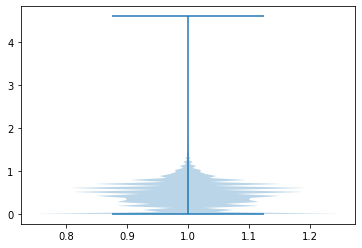

In [ ]:
import matplotlib.pyplot as plt

plt.violinplot(df_marketSupply_online["Charge time"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f141c2f6110>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f141c0afd90>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f141bf241d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f141c2f6390>}

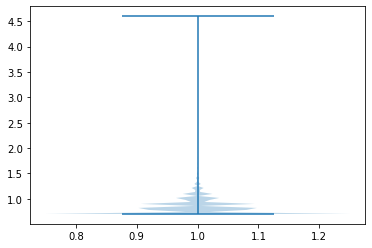

In [ ]:
import matplotlib.pyplot as plt

#plt.violinplot(df_datos_cortos["Charge time"])
plt.violinplot(df_datos_largos["Charge time"])


In [ ]:
df_datos_largos.describe()

,Online time,Charge time,Calls received,Trips completed
count,62418.000000,62418.000000,62418.000000,62418.000000
mean,0.915196,0.825550,2.788314,1.403650
std,0.151683,0.159326,1.365628,1.320544
min,0.000000,0.700000,1.000000,0.000000
25%,0.900000,0.700000,2.000000,0.000000
50%,1.000000,0.800000,3.000000,1.000000
75%,1.000000,0.900000,4.000000,2.000000
max,1.000000,4.600000,16.000000,15.000000


In [ ]:
df_marketSupply_online["Grupo"] = df_marketSupply_online['Charge time'].apply(lambda x: 'Grupo 1' if x <= 0.3 else 'Grupo 2' if (x> 0.3 and x<= 0.6) else 'Grupo 3')

In [ ]:
df_analisis_market = df_marketSupply_online.groupby("Grupo").count()

In [ ]:
df_analisis_market.drop(["Online time","Calls received","Trips completed","dayOfWeek"],axis=1,inplace=True)

In [ ]:
df_analisis_market.reset_index(inplace=True)

In [ ]:
df_analisis_market

,Grupo,Charge time
0,Grupo 1,104090
1,Grupo 2,98986
2,Grupo 3,62418


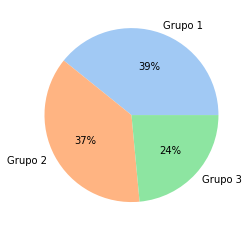

In [ ]:
import seaborn as sns
labels = ["Grupo 1","Grupo 2","Grupo 3"]
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(df_analisis_market["Charge time"], labels = labels , colors = colors, autopct='%.0f%%')
plt.show()

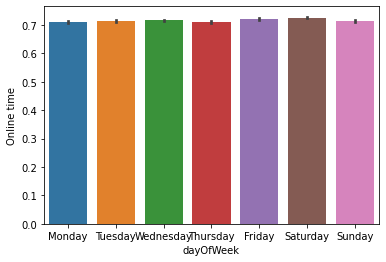

In [ ]:
import seaborn as sns
sns.barplot(data=df_marketSupply_online, x="dayOfWeek", y="Online time")

In [ ]:
df_marketSupply_online["Trips control"] = df_marketSupply_online["Trips completed"]-df_marketSupply_online["Calls received"]

In [ ]:
df_marketSupply_online

,Online time,Charge time,Calls received,Trips completed,dayOfWeek,Grupo,Trips control
0,0.8,0.5,2.0,1.0,Monday,Grupo 2,-1.0
2,0.8,0.7,3.0,2.0,Monday,Grupo 3,-1.0
3,0.9,0.5,5.0,5.0,Monday,Grupo 2,0.0
5,1.0,0.5,2.0,0.0,Monday,Grupo 2,-2.0
6,1.0,0.6,5.0,1.0,Monday,Grupo 2,-4.0
...,...,...,...,...,...,...,...
316565,0.0,0.0,1.0,1.0,Sunday,Grupo 1,0.0
316566,0.6,0.7,3.0,2.0,Sunday,Grupo 3,-1.0
316567,0.8,0.4,3.0,2.0,Sunday,Grupo 2,-1.0
316568,0.8,0.3,4.0,4.0,Sunday,Grupo 1,0.0


In [ ]:
df_marketSupply_online["Control Group trips"] = df_marketSupply_online['Trips control'].apply(lambda x: 'Grupo 1' if x < 0 else 'Grupo 2')

In [ ]:
df_marketSupply_online

,Online time,Charge time,Calls received,Trips completed,dayOfWeek,Grupo,Trips control,Control Group trips
0,0.8,0.5,2.0,1.0,Monday,Grupo 2,-1.0,Grupo 1
2,0.8,0.7,3.0,2.0,Monday,Grupo 3,-1.0,Grupo 1
3,0.9,0.5,5.0,5.0,Monday,Grupo 2,0.0,Grupo 2
5,1.0,0.5,2.0,0.0,Monday,Grupo 2,-2.0,Grupo 1
6,1.0,0.6,5.0,1.0,Monday,Grupo 2,-4.0,Grupo 1
...,...,...,...,...,...,...,...,...
316565,0.0,0.0,1.0,1.0,Sunday,Grupo 1,0.0,Grupo 2
316566,0.6,0.7,3.0,2.0,Sunday,Grupo 3,-1.0,Grupo 1
316567,0.8,0.4,3.0,2.0,Sunday,Grupo 2,-1.0,Grupo 1
316568,0.8,0.3,4.0,4.0,Sunday,Grupo 1,0.0,Grupo 2


In [ ]:
df_analisis_market_trips = df_marketSupply_online.groupby("Control Group trips").count()

In [ ]:
df_analisis_market_trips

,Online time,Charge time,Calls received,Trips completed,dayOfWeek,Grupo,Trips control
Control Group trips,,,,,,,
Grupo 1,179101,179101,179101,179101,179101,179101,179101
Grupo 2,86393,86393,86393,86393,86393,86393,86393


In [ ]:
df_analisis_market_trips.drop(["Online time","Calls received","Trips completed","dayOfWeek","Grupo","Charge time"],axis=1,inplace=True)

In [ ]:
df_analisis_market_trips.reset_index(inplace=True)

In [ ]:
df_analisis_market_trips

,Control Group trips,Trips control
0,Grupo 1,179101
1,Grupo 2,86393


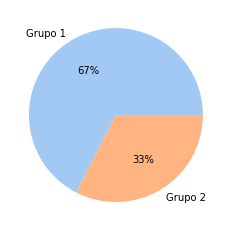

In [ ]:
import seaborn as sns
labels = ["Grupo 1","Grupo 2"]
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(df_analisis_market_trips["Trips control"], labels = labels , colors = colors, autopct='%.0f%%')
plt.show()